## Download Kepler/K2/TESS Data

Downloading one Kepler file for the target: 

In [6]:
from lightkurve import search_lightcurvefile
import numpy as np
import astropy.units as u
search_lightcurvefile('KIC 11551430')

#,observation,target_name,productFilename,distance
0,Kepler Quarter 0,kplr011551430,kplr011551430-2009131105131_llc.fits,0.0
1,Kepler Quarter 1,kplr011551430,kplr011551430-2009166043257_llc.fits,0.0
2,Kepler Quarter 2,kplr011551430,kplr011551430-2009259160929_llc.fits,0.0
3,Kepler Quarter 3,kplr011551430,kplr011551430-2009350155506_llc.fits,0.0
4,Kepler Quarter 4,kplr011551430,kplr011551430-2010009091648_llc.fits,0.0
5,Kepler Quarter 5,kplr011551430,kplr011551430-2010174085026_llc.fits,0.0
6,Kepler Quarter 6,kplr011551430,kplr011551430-2010265121752_llc.fits,0.0
7,Kepler Quarter 7,kplr011551430,kplr011551430-2010355172524_llc.fits,0.0
8,Kepler Quarter 9,kplr011551430,kplr011551430-2011177032512_llc.fits,0.0
9,Kepler Quarter 10,kplr011551430,kplr011551430-2011271113734_llc.fits,0.0


# Downloading one lightcurve file

In [4]:
lcf = search_lightcurvefile('KIC 11551430',quarter=1).download()
lc = lcf.PDCSAP_FLUX.remove_nans()
lc1_pg = lc.to_periodogram(oversample_factor=1)
period = lc1_pg.period_at_max_power
lc = lc.flatten().fold(period=period).bin(binsize=30)
print(period)
#Can plot the file if you want
#lc.scatter();

4.183893344876196 d


In [7]:
periodogram = lc.to_periodogram(minimum_period=3*u.day, maximum_period=5*u.day, oversample_factor=10)
period_final = periodogram.period_at_max_power
print(period_final)
#plug this back in as the period value

3.3117443735070955 d


In [74]:
#In case we need to save as a fits file
#lc.to_fits(path='KIC11551430.fits', overwrite=True)

In [8]:
#saves the flux and time of the first file only as numpy arrays
time = lcf.time
flux = lcf.PDCSAP_FLUX
np.save('KIC_11551430_time',time)
np.save('KIC_11551430_flux',flux)

# Downloading all/multiple Kepler lightcurves

Stitches all lightcurve files together in a way that can be edited/formatted:

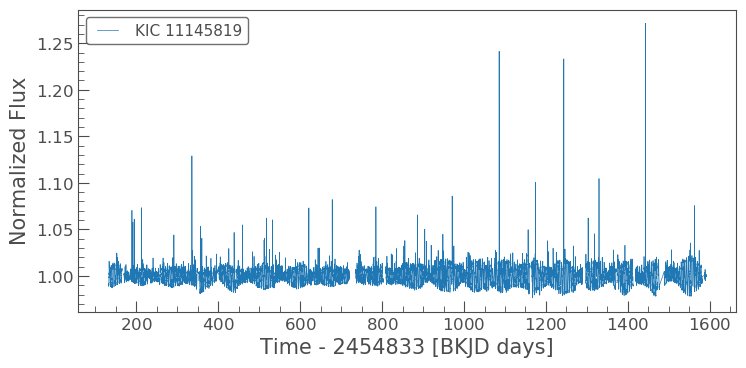

In [10]:
import lightkurve as lk
lcf_all = search_lightcurvefile('KIC 11145819').download_all()
lcf_all.PDCSAP_FLUX.plot()
lc_list = lcf_all

#make a list of each file's quarter so the loop can start at third file even if that file's quarter isn't 3
quarters = []
for file in lc_list:
    if file.mission=='Kepler':
        quarters.append(file.quarter)
        
#edit and stitch the first two, then add to collection -
#because the collection can't be added to without already having something inside
lc_1 = search_lightcurvefile('KIC 11145819',quarter=quarters[0]).download()
lc_2 = search_lightcurvefile('KIC 11145819',quarter=quarters[1]).download()
pdcsap_lc_1 = lc_1.PDCSAP_FLUX
pdcsap_lc_2 = lc_2.PDCSAP_FLUX
pdcsap_lc_1.remove_nans()
pdcsap_lc_2.remove_nans()
lc_collection = lk.LightCurveCollection([pdcsap_lc_1,pdcsap_lc_2])

#loop starts at third file and changes them to a form that can be stitched and edited
#this can be tweaked to clip out any section of files that are interesting instead of every file
for quarter in quarters[2:]:
    lc_file = search_lightcurvefile('KIC 11145819',quarter=quarter).download()
    pdcsap_lc = lc_file.PDCSAP_FLUX
    lc_collection.append(pdcsap_lc)
    
#stitch all and edit
stitched_lc = lc_collection.stitch().remove_nans()
lc_pg = stitched_lc.to_periodogram(oversample_factor=1)
peri = lc_pg.period_at_max_power
#can plug "peri" into the period argument 
final_lc = stitched_lc.flatten().fold(period=4.295169157333749).bin(binsize=30)

In [11]:
#I use this to get a more accurate period once I have an approximate one and plug it into the period argument above
periodogram = stitched_lc.to_periodogram(minimum_period=3*u.day, maximum_period=5*u.day, oversample_factor=10)
peri_final = periodogram.period_at_max_power
print(peri_final)

4.295169157333749 d


In [16]:
#saves these as numpy arrays
full_time = final_lc.time
full_flux = final_lc.flux
np.save('KIC_11551430_full_time',time)
np.save('KIC_11551430_full_flux',flux)